<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/RanFor_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# Step 1: Download dataset
path = kagglehub.dataset_download("marshalpatel3558/diabetes-prediction-dataset-legit-dataset")
print("Path to dataset files:", path)

100%|██████████| 15.6k/15.6k [00:00<00:00, 18.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset/versions/1


In [9]:
# Step 2: Load data
data_path = f"{path}/Dataset of Diabetes .csv"
df = pd.read_csv(data_path)

In [14]:
# Step 3: Preprocessing
# Check for nulls
print("Missing values:\n", df.isnull().sum())

# Convert categorical variables if necessary
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Separate features and target
X = df.drop('CLASS', axis=1)
y = df['CLASS']

Missing values:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [16]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 5: Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Step 6: Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           N       0.95      1.00      0.98        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       172
          Y        0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
 [[ 21   0   0   0]
 [  0   6   0   0]
 [  1   0 171   0]
 [  0   0   1   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


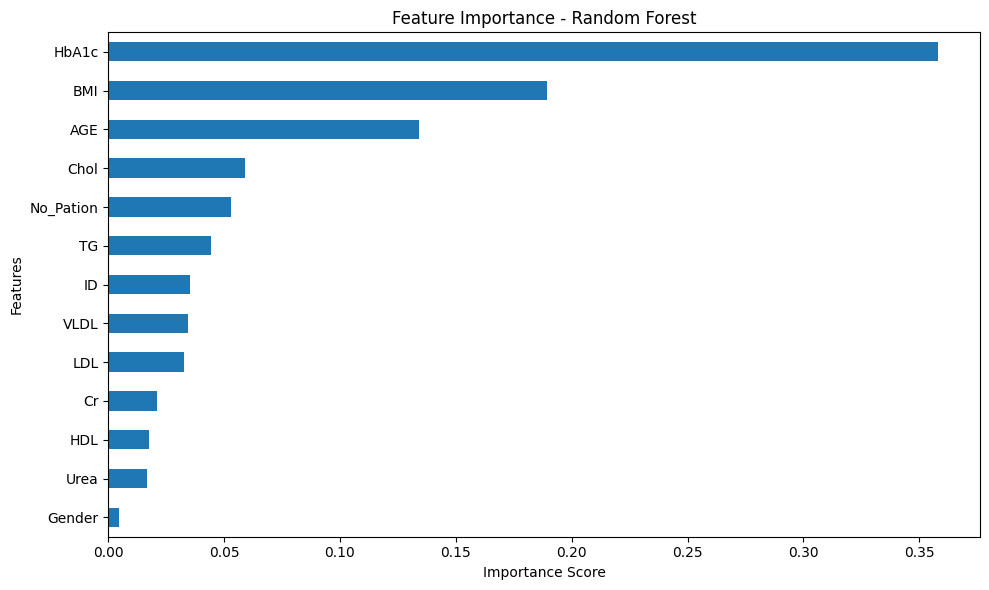

In [19]:
# Step 7: Feature Importance Visualization
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()